In [12]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import pi

def singlerun(ka,NA,L,run,duration):
    import numpy as np
    rng = GSLRandomNumberGenerator()
    rng.seed(run)
    rm = 0.005
    R=2*rm
    voxelr=rm
    D = 1.
    td =(2*voxelr)**2/(4*D)
    #print('td',td)
    ori = Real3(0.5*L,0,0)
    unit0 = Real3(0,0,L)
    unit1 = Real3(0,L,0)        
    w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),voxelr,rng)
    lx,ly,lz=w.actual_lengths()
    Area= ly*lz

    with species_attributes():
        A |  {'D': str(D), 'radius':str(voxelr)}
        B |  {'D': str(0), 'radius':str(voxelr),'location':'M'}

    with reaction_rules():#for spa and egfrd
        A + M > B | ka
        B > M  | 10000

    m2 = get_model()
    w.bind_to(m2)
    w.add_structure(Species('M'),PlanarSurface(ori,unit0,unit1))
    w.add_molecules(Species('A'), NA)
    #viz.plot_world(w,species_list=('A','M'))    
    sim = spatiocyte.SpatiocyteSimulator(w)
    sim.initialize()
    #obs = NumberObserver('B')
    obs=FixedIntervalNumberObserver(td*10,'A')
    #sim.run(duration)
    sim.run(duration,obs)        
    #print('ka',ka,'evaluated ka',res*Area/sim.dt()/NA/NB)        
    #obs=[0]
    tlogs,nalog=np.array(obs.data()).T

    return tlogs,nalog

NA=500
L=1
ka = 1
dur=2
tlogs,nalog=singlerun(ka,NA,L,1,dur)

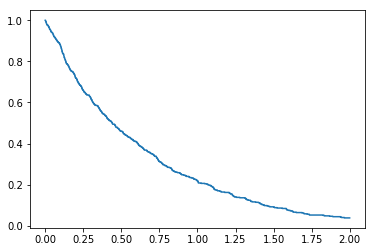

In [16]:
plt.plot(tlogs,nalog/NA)

In [3]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import pi

def wrap(job,job_id,task_id):
    def singlerun(ka,NA,L,run,duration):
        import numpy as np
        rng = GSLRandomNumberGenerator()
        rng.seed(run)
        rm = 0.005
        R=2*rm
        voxelr=rm
        D = 1.
        td =(2*voxelr)**2/(4*D)
        #print('td',td)
        H = 3*voxelr*2
        ori = Real3(0.5*H,0,0)
        unit0 = Real3(0,0,L)
        unit1 = Real3(0,L,0)        
        w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),voxelr,rng)
        lx,ly,lz=w.actual_lengths()
        Area= ly*lz

        with species_attributes():
            B |  {'D': str(D), 'radius':str(voxelr),'location':'M'}
            A |  {'D': str(D), 'radius':str(voxelr)}

        with reaction_rules():#for spa and egfrd
            A + M > B | ka

        m2 = get_model()
        w.bind_to(m2)
        w.add_structure(Species('M'),PlanarSurface(ori,unit0,unit1))
        w.add_molecules(Species('A'), NA)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        obs = NumberObserver(('A','B'))
        #obs=FixedIntervalNumberObserver(td,'A')
        #sim.run(duration)
        sim.run(duration,obs)        
        #print('ka',ka,'evaluated ka',res*Area/sim.dt()/NA/NB)        
        #obs=[0]
        tlogs,nalog,nblog=np.array(obs.data()).T
        return tlogs,nalog,nblog
    job.update({'run':task_id})
    out=singlerun(**job)
    return out

NA=500
L=1
ka = 1
dur=2

simrun=1

jobs=[{'ka':ka,'L':L,'NA':NA,'duration':dur}]
res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=60,modules=('numpy','ecell4','math'))[0]
print('finish') 


finish


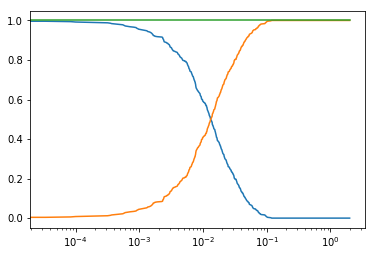

In [5]:
plt.semilogx(res[0][0],res[0][1]/NA)
plt.semilogx(res[0][0],res[0][2]/NA)
plt.semilogx(res[0][0],(res[0][1]+res[0][2])/NA)

In [9]:
voxelr=0.005
H = 3*voxelr*2
w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),voxelr)
size=tuple(w.calculate_shape(Real3(H,L,L),voxelr))
Nmv=size[1]*size[2]    
print('phil={}%'.format(N*100/Nmv))
Area=Nmv*(2*voxelr)**2
c0=NB/Area
print('c0',c0)

phil=0.10986757295206843%
c0 10.463578376387469


In [10]:
c0=10.4636
kf=0.1
ka=kf*2*pi*1
K=1
kd=ka/K
sinf=kd/(kd+c0*ka)
ka,kd

(0.6283185307179586, 0.6283185307179586)

In [54]:
(2*voxelr)**2/(4*1)

2.5e-05

In [56]:
1.25/5

0.25